In [330]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances
from scipy.sparse import csr_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


#Vancouver Listings File

In [331]:
data=pd.read_csv(f'C:/Users/16194/OneDrive - CSULB/Desktop/Portfolio/Redfin WebScrapping/Redfin_real_estate_analysis/data_Vancouver, BC_done.csv')
data

,price_list,Address,Type,City,Province,Postal Code,Number of Bedroom,Number of Bathroom,Square Ft
0,4988000,1238 Seymour St,Apartment,Vancouver,BC,V6B 6J3,7,6.500000000,6555
1,1399000,1316 Victoria Dr,Single House,Vancouver,BC,V5L 4G8,3,3.500000000,1154
2,4398000,846 E 27th Ave,Single House,Vancouver,BC,V5V 2L2,5,5.500000000,4349
3,559900,5665 Boundary Rd,Apartment,Vancouver,BC,V5R 0E4,1,1.000000000,515
4,2799000,1816 W 62nd Ave,Single House,Vancouver,BC,V6P 2G4,4,1.500000000,2241
...,...,...,...,...,...,...,...,...,...
4693,713000,1001 Richards St,Apartment,Vancouver,BC,V6B 1J6,1,1.000000000,601
4694,729000,602 Citadel Parade,Apartment,Vancouver,BC,V6B 1X2,1,1.000000000,624
4695,1329000,212 Davie St,Apartment,Vancouver,BC,V6B 5Z4,2,2.000000000,1222
4696,619000,668 Citadel Parade,Apartment,Vancouver,BC,V6B 1W6,1,1.000000000,502


In [332]:
#Rename column 
data=data.rename(columns={" price_list ":"Price"})
data

,Price,Address,Type,City,Province,Postal Code,Number of Bedroom,Number of Bathroom,Square Ft
0,4988000,1238 Seymour St,Apartment,Vancouver,BC,V6B 6J3,7,6.500000000,6555
1,1399000,1316 Victoria Dr,Single House,Vancouver,BC,V5L 4G8,3,3.500000000,1154
2,4398000,846 E 27th Ave,Single House,Vancouver,BC,V5V 2L2,5,5.500000000,4349
3,559900,5665 Boundary Rd,Apartment,Vancouver,BC,V5R 0E4,1,1.000000000,515
4,2799000,1816 W 62nd Ave,Single House,Vancouver,BC,V6P 2G4,4,1.500000000,2241
...,...,...,...,...,...,...,...,...,...
4693,713000,1001 Richards St,Apartment,Vancouver,BC,V6B 1J6,1,1.000000000,601
4694,729000,602 Citadel Parade,Apartment,Vancouver,BC,V6B 1X2,1,1.000000000,624
4695,1329000,212 Davie St,Apartment,Vancouver,BC,V6B 5Z4,2,2.000000000,1222
4696,619000,668 Citadel Parade,Apartment,Vancouver,BC,V6B 1W6,1,1.000000000,502


In [333]:
pd.set_option('display.float_format', lambda x: '%.9f' % x)

In [334]:
data.describe()

,Price,Number of Bedroom,Number of Bathroom,Square Ft
count,4698.000000000,4698.000000000,4698.000000000,4698.000000000
mean,1958626.521498510,2.719667944,2.361643252,1625.340144742
std,2185522.780329627,1.676002694,1.470457654,1346.832569351
min,215000.000000000,1.000000000,0.500000000,317.000000000
25%,798000.000000000,1.000000000,1.000000000,749.250000000
50%,1348000.000000000,2.000000000,2.000000000,1180.000000000
75%,2288800.000000000,4.000000000,3.000000000,2010.000000000
max,26888000.000000000,9.000000000,10.000000000,10510.000000000


In [335]:
data.shape

(4698, 9)

In [336]:
data.dtypes

Price                   int64
Address                object
Type                   object
City                   object
Province               object
Postal Code            object
Number of Bedroom       int64
Number of Bathroom    float64
Square Ft               int64
dtype: object

In [337]:
#Checking null value
data.isnull().sum()

Price                 0
Address               0
Type                  0
City                  0
Province              0
Postal Code           0
Number of Bedroom     0
Number of Bathroom    0
Square Ft             0
dtype: int64

#Exploring Data

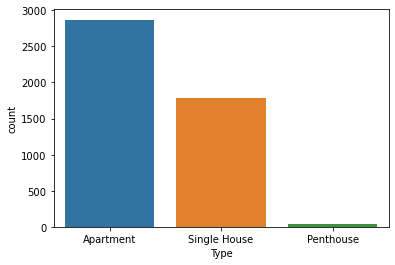

In [338]:
#Exploring Housing Type 
snsplot= sns.countplot(x='Type', data= data)

In [369]:
data['Type'].value_counts()

Apartment       2870
Single House    1784
Penthouse         44
Name: Type, dtype: int64

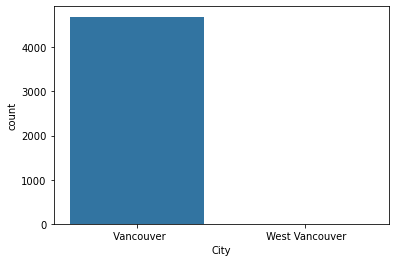

In [340]:
#Exploring City
snsplot= sns.countplot(x='City', data= data)

In [341]:
data['City'].value_counts()

 Vancouver         4694
 West Vancouver       4
Name: City, dtype: int64

Text(0.5, 1.0, 'Histogram of Number of Bedroom')

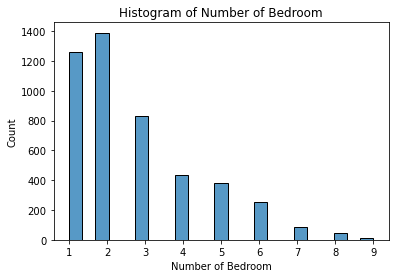

In [342]:
#Show Histogram of Number of Bedroom
snsplot2= sns.histplot(x= 'Number of Bedroom', data= data)
snsplot2.set_title("Histogram of Number of Bedroom")

Text(0.5, 1.0, 'Histogram of Number of Bathroom')

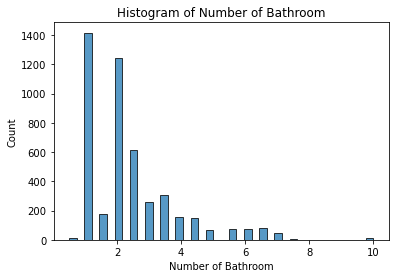

In [343]:
#Show Histogram of Number of Bedroom
snsplot2= sns.histplot(x= 'Number of Bathroom', data= data)
snsplot2.set_title("Histogram of Number of Bathroom")

Text(0.5, 1.0, 'Histogram of Price')

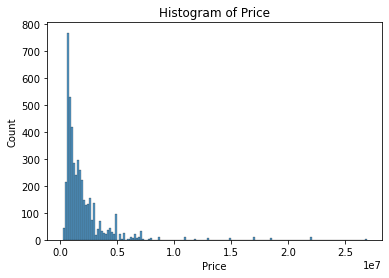

In [344]:
#Show Histogram of Price
snsplot2= sns.histplot(x= 'Price', data= data)
snsplot2.set_title("Histogram of Price")

In [345]:
#Correlation
data.corr()

,Price,Number of Bedroom,Number of Bathroom,Square Ft
Price,1.000000000,0.539139066,0.665654944,0.845764609
Number of Bedroom,0.539139066,1.000000000,0.837769836,0.767516595
Number of Bathroom,0.665654944,0.837769836,1.000000000,0.838395302
Square Ft,0.845764609,0.767516595,0.838395302,1.000000000


c:\Users\16194\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

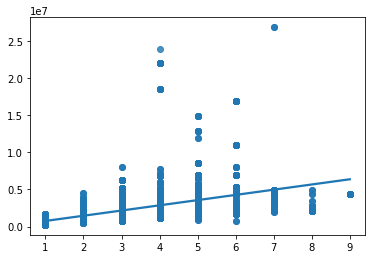

In [346]:
#Regression Graph b/t # of Bedroom and Price
x=data['Number of Bedroom'].tolist()
y=data['Price'].tolist()
sns.regplot(x, y, ci=None)

c:\Users\16194\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

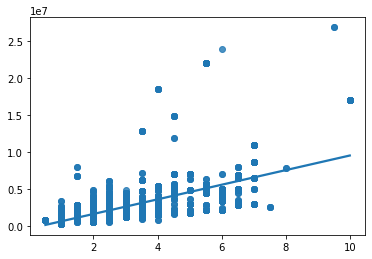

In [347]:
#Regression Graph b/t # of Bathroom and Price
x=data['Number of Bathroom'].tolist()
y=data['Price'].tolist()
sns.regplot(x, y, ci=None)

c:\Users\16194\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

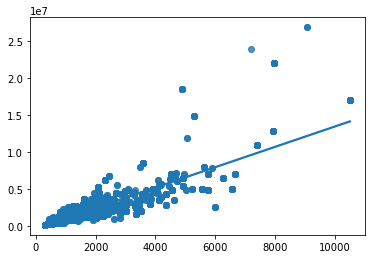

In [348]:
#Regression Graph b/t # of Bathroom and Price
x=data['Square Ft'].tolist()
y=data['Price'].tolist()
sns.regplot(x, y, ci=None)

In [349]:
data.groupby('Type')['Price'].mean()

Type
Apartment      1198162.611149826
Penthouse      2540068.181818182
Single House   3167678.085201794
Name: Price, dtype: float64

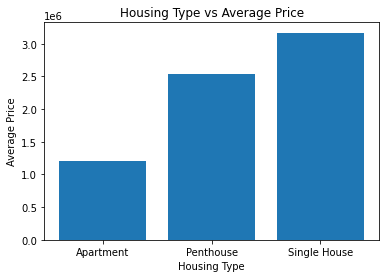

In [350]:
x=['Apartment','Penthouse','Single House']
y=data.groupby('Type')['Price'].mean().values.tolist()
plt.bar(x,y)
plt.title('Housing Type vs Average Price')
plt.xlabel('Housing Type')
plt.ylabel('Average Price')
plt.show()


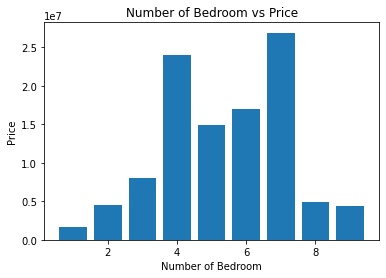

In [351]:
x=data['Number of Bedroom'].tolist()
y=data['Price'].tolist()

plt.bar(x,y)
plt.title('Number of Bedroom vs Price')
plt.xlabel('Number of Bedroom')
plt.ylabel('Price')
plt.show()

#Vancouver Sold Houses

In [352]:
df=pd.read_csv(f'C:/Users/16194/OneDrive - CSULB/Desktop/Portfolio/Redfin WebScrapping/Redfin_real_estate_analysis/data_sold_property_Vancouver, BC_done.csv')
df

,Price,address,Type,City,Province,Unnamed: 5,Number of Bedrooms,Number of Bathrooms,Square Ft.,Sold_date
0,3243000,5741 Rhodes St,Single House,Vancouver,BC,V5R 3P3,6.000000000,6.500000000,3152,5/31/2022
1,520000,3660 Vanness Ave,Apartment,Vancouver,BC,V5R 6H8,1.000000000,1.000000000,583,3/10/2022
2,520000,3660 Vanness Ave,Apartment,Vancouver,BC,V5R 6H8,1.000000000,1.000000000,583,3/10/2022
3,550000,3480 Yardley Ave,Apartment,Vancouver,BC,V5R,2.000000000,1.000000000,759,8/31/2022
4,1780000,3248 Austrey Ave,Single House,Vancouver,BC,V5R 4V7,6.000000000,3.000000000,2023,5/30/2022
...,...,...,...,...,...,...,...,...,...,...
1095,575800,204-53 W Hastings St,Apartment,Vancouver,BC,V6B 1G4,2.000000000,1.000000000,797,4/29/2022
1096,608000,188 Keefer St,Apartment,Vancouver,BC,V6A 1X4,1.000000000,1.000000000,520,10/31/2022
1097,1388888,1925 Alberni St,Apartment,Vancouver,BC,V6G 0A3,2.000000000,2.500000000,1038,11/22/2022
1098,603000,1009 Harwood St,Apartment,Vancouver,BC,V6Z 0C2,1.000000000,1.000000000,479,5/6/2022


In [353]:
df.describe()

,Price,Number of Bedrooms,Number of Bathrooms,Square Ft.
count,1100.000000000,1100.000000000,1100.000000000,1100.000000000
mean,1741085.577272727,2.570000000,2.149090909,1526.073636364
std,1551337.622055548,1.666347862,1.323837960,1136.884231250
min,460000.000000000,1.000000000,1.000000000,453.000000000
25%,773000.000000000,1.000000000,1.000000000,741.750000000
50%,1190000.000000000,2.000000000,2.000000000,1100.000000000
75%,2068000.000000000,4.000000000,2.500000000,1964.250000000
max,11900000.000000000,8.000000000,8.000000000,6000.000000000


In [354]:
df.shape

(1100, 10)

In [355]:
df.dtypes

Price                    int64
address                 object
Type                    object
City                    object
Province                object
Unnamed: 5              object
Number of Bedrooms     float64
Number of Bathrooms    float64
Square Ft.               int64
Sold_date               object
dtype: object

In [356]:
#Change Sold_date column data type
df['Sold_date'] = df['Sold_date'].astype('datetime64[ns]')

In [357]:
#Checking null value
data.isnull().sum()

Price                 0
Address               0
Type                  0
City                  0
Province              0
Postal Code           0
Number of Bedroom     0
Number of Bathroom    0
Square Ft             0
dtype: int64

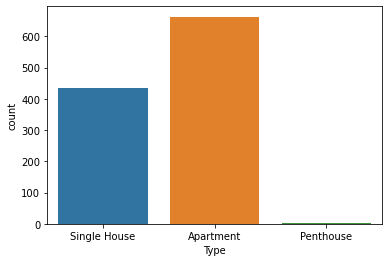

In [358]:
#Exploring Housing Type 
snsplot= sns.countplot(x='Type', data= df)

In [359]:
df['Type'].value_counts()

Apartment       663
Single House    436
Penthouse         1
Name: Type, dtype: int64

In [375]:
x=df.groupby('Type')['Sold_date'].count()
x

Type
Apartment       663
Penthouse         1
Single House    436
Name: Sold_date, dtype: int64

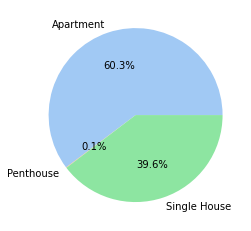

In [380]:
x=df.groupby('Type')['Sold_date'].count().values.tolist()

labels = ['Apartment','Penthouse','Single House']
colors = sns.color_palette('pastel')
plt.pie(x, labels=labels,colors = colors, autopct = '%0.1f%%')
plt.show()

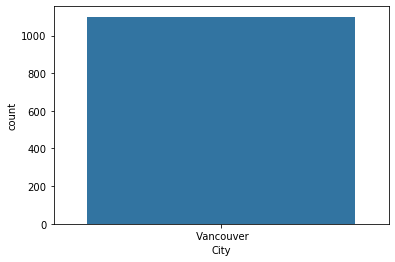

In [360]:
#Exploring City
snsplot= sns.countplot(x='City', data= df)

In [361]:
df['City'].value_counts()

 Vancouver    1100
Name: City, dtype: int64

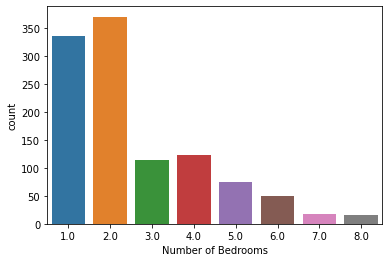

In [362]:
#Show Histogram of Number of Bedroom
snsplot2= sns.countplot(x= 'Number of Bedrooms', data= df)


Text(0.5, 1.0, 'Histogram of Number of Bathroom')

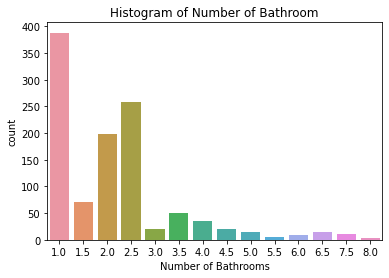

In [363]:
snsplot2= sns.countplot(x= 'Number of Bathrooms', data= df)
snsplot2.set_title("Histogram of Number of Bathroom")

Text(0.5, 1.0, 'Histogram of Price')

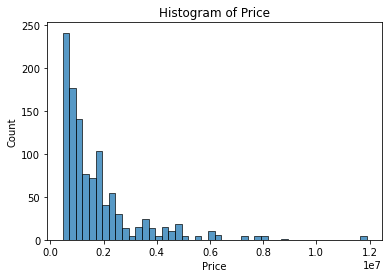

In [364]:
#Show Histogram of Price
snsplot2= sns.histplot(x= 'Price', data= df)
snsplot2.set_title("Histogram of Price")

c:\Users\16194\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

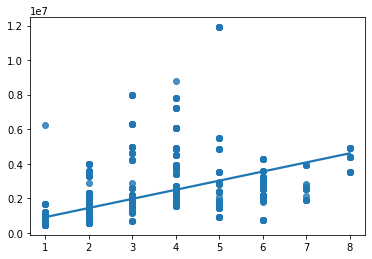

In [366]:
#Regression Graph b/t # of Bedroom and Price
x=df['Number of Bedrooms'].tolist()
y=df['Price'].tolist()
sns.regplot(x, y, ci=None)

c:\Users\16194\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

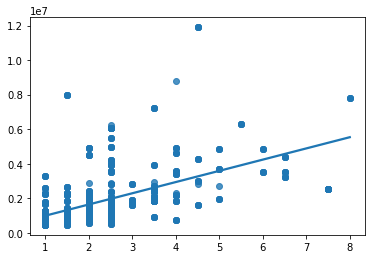

In [367]:
#Regression Graph b/t # of Bathroom and Price
x=df['Number of Bathrooms'].tolist()
y=df['Price'].tolist()
sns.regplot(x, y, ci=None)

c:\Users\16194\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

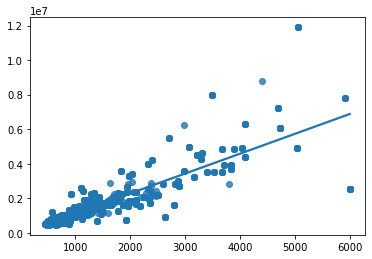

In [368]:
#Regression Graph b/t # of Bathroom and Price
x=df['Square Ft.'].tolist()
y=df['Price'].tolist()
sns.regplot(x, y, ci=None)

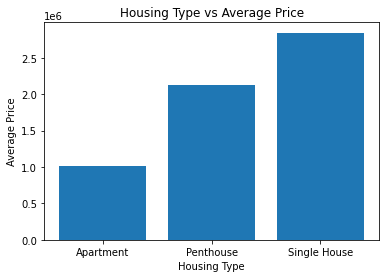

In [382]:
x=['Apartment','Penthouse','Single House']
y=df.groupby('Type')['Price'].mean().values.tolist()
plt.bar(x,y)
plt.title('Housing Type vs Average Price')
plt.xlabel('Housing Type')
plt.ylabel('Average Price')
plt.show()


In [383]:
df.groupby('Type')['Price'].mean()

Type
Apartment      1016027.447963801
Penthouse      2125000.000000000
Single House   2842759.029816514
Name: Price, dtype: float64

In [391]:
df['Month_sold']=df['Sold_date'].dt.month
df

,Price,address,Type,City,Province,Unnamed: 5,Number of Bedrooms,Number of Bathrooms,Square Ft.,Sold_date,Month_sold
0,3243000,5741 Rhodes St,Single House,Vancouver,BC,V5R 3P3,6.000000000,6.500000000,3152,2022-05-31,5
1,520000,3660 Vanness Ave,Apartment,Vancouver,BC,V5R 6H8,1.000000000,1.000000000,583,2022-03-10,3
2,520000,3660 Vanness Ave,Apartment,Vancouver,BC,V5R 6H8,1.000000000,1.000000000,583,2022-03-10,3
3,550000,3480 Yardley Ave,Apartment,Vancouver,BC,V5R,2.000000000,1.000000000,759,2022-08-31,8
4,1780000,3248 Austrey Ave,Single House,Vancouver,BC,V5R 4V7,6.000000000,3.000000000,2023,2022-05-30,5
...,...,...,...,...,...,...,...,...,...,...,...
1095,575800,204-53 W Hastings St,Apartment,Vancouver,BC,V6B 1G4,2.000000000,1.000000000,797,2022-04-29,4
1096,608000,188 Keefer St,Apartment,Vancouver,BC,V6A 1X4,1.000000000,1.000000000,520,2022-10-31,10
1097,1388888,1925 Alberni St,Apartment,Vancouver,BC,V6G 0A3,2.000000000,2.500000000,1038,2022-11-22,11
1098,603000,1009 Harwood St,Apartment,Vancouver,BC,V6Z 0C2,1.000000000,1.000000000,479,2022-05-06,5


Text(0.5, 1.0, 'Histogram of Month Sold')

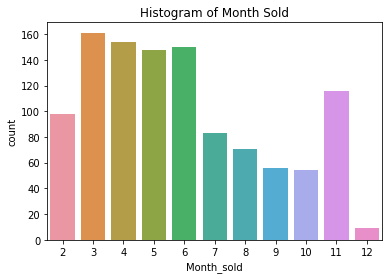

In [392]:
#Month that sold most house
snsplot2= sns.countplot(x= 'Month_sold', data= df)
snsplot2.set_title("Histogram of Month Sold")

In [393]:
df.corr()

,Price,Number of Bedrooms,Number of Bathrooms,Square Ft.,Month_sold
Price,1.000000000,0.566546703,0.553573611,0.841667972,0.079580237
Number of Bedrooms,0.566546703,1.000000000,0.722877641,0.763789114,0.088363305
Number of Bathrooms,0.553573611,0.722877641,1.000000000,0.751249689,0.210697628
Square Ft.,0.841667972,0.763789114,0.751249689,1.000000000,0.162612704
Month_sold,0.079580237,0.088363305,0.210697628,0.162612704,1.000000000
